
# Encoding Categorical Variables

**Author:** IT24201195 – Palugaswewa K.I.K.I. B

This notebook groups rare car names and one‑hot encodes categorical features.


In [2]:
import sklearn
print(sklearn.__version__)


1.7.2


In [3]:

import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt

train_df = pd.read_csv('C:/Users/ASUS TUF/Desktop/SLIIT/Y2S1/AI and ML (IT2011)/ASSignment/train-data.csv', index_col=False)
test_df = pd.read_csv('C:/Users/ASUS TUF/Desktop/SLIIT/Y2S1/AI and ML (IT2011)/ASSignment/test-data.csv', index_col=False)

for df in [train_df, test_df]:
    if 'Unnamed: 0' in df.columns:
        df.drop(columns=['Unnamed: 0'], inplace=True)
    df.drop_duplicates(inplace=True)

# Group top 50 names
name_counts = train_df['Name'].value_counts()
top_names = name_counts.nlargest(50).index.tolist()
for df in [train_df, test_df]:
    df['Name_Grouped'] = df['Name'].apply(lambda x: x if x in top_names else 'Other')

categorical_features = ['Name_Grouped','Location','Fuel_Type','Transmission','Owner_Type']

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_train = encoder.fit_transform(train_df[categorical_features])
encoded_test = encoder.transform(test_df[categorical_features])

print('Encoded train shape:', encoded_train.shape)


Encoded train shape: (6019, 73)


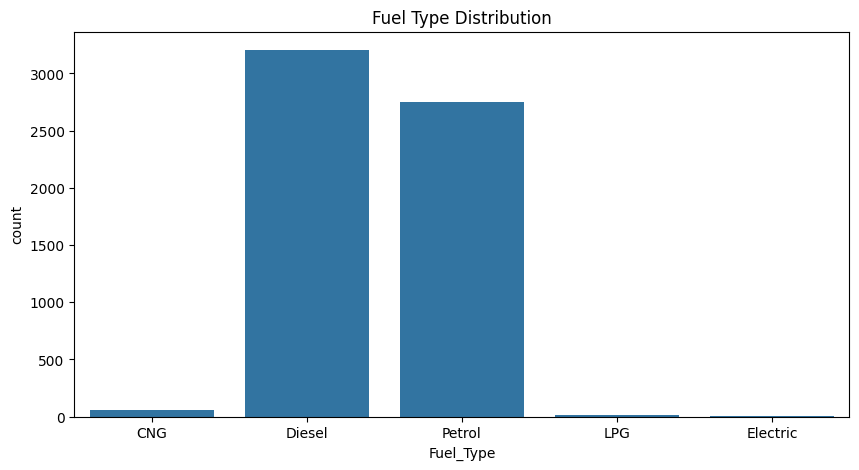

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.countplot(data=train_df, x='Fuel_Type')
plt.title("Fuel Type Distribution")
plt.show()

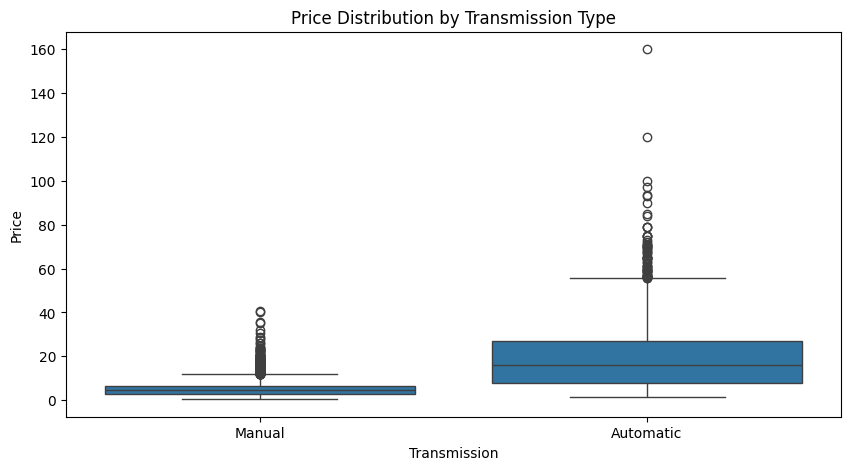

In [5]:
plt.figure(figsize=(10,5))
sns.boxplot(data=train_df, x='Transmission', y='Price')
plt.title("Price Distribution by Transmission Type")
plt.show()